<a href="https://colab.research.google.com/github/ddemirel1/Deep-Learning-With-Python/blob/main/ClassifyingNewswiresMulticlassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/9
16/16 [==============================] - 2s 79ms/step - loss: 2.6037 - accuracy: 0.5289 - val_loss: 1.7250 - val_accuracy: 0.6450
Epoch 2/9
16/16 [==============================] - 1s 51ms/step - loss: 1.4132 - accuracy: 0.7110 - val_loss: 1.2992 - val_accuracy: 0.7220
Epoch 3/9
16/16 [==============================] - 1s 62ms/step - loss: 1.0440 - accuracy: 0.7819 - val_loss: 1.1413 - val_accuracy: 0.7500
Epoch 4/9
16/16 [==============================] - 1s 62ms/step - loss: 0.8238 - accuracy: 0.8274 - val_loss: 1.0295 - val_accuracy: 0.7880
Epoch 5/9
16/16 [==============================] - 1s 62ms/step - loss: 0.6583 - accuracy: 0.8619 - val_loss: 0.9848 - val_accuracy: 0.8050
Epoch 6/9
16/16 [==============================] - 1s 62ms/step - loss: 0.5260 - accuracy: 0.8876 - val_loss: 0.9515 - val_accuracy: 0.7970
Epoch 7/9
16/16 [==============================] - 1s 62ms/step - loss: 0.4254 - accuracy: 0.9085 - val_loss: 0.9132 - val_accuracy: 0.8140
Epoch 8/9
16/16 [===

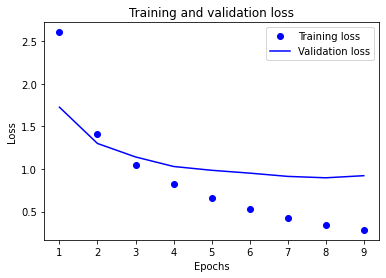

In [7]:
# load data
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

# encode input data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# encode the labels 
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

# model definition
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# prepare the validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))
# plot
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




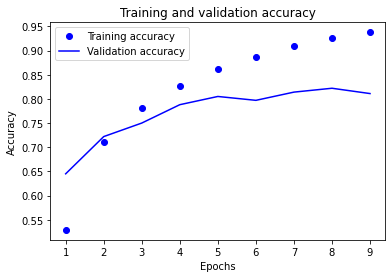

In [8]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [10]:
predictions = model.predict(x_test)
predictions[0].shape
np.argmax(predictions[0])


71/71 [==============================] - 0s 5ms/step


3